# **Importing** **Libraries**

In [102]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score

# **Observing the given Dataset**

In [103]:
df = pd.read_csv('titanic.csv')
print(df.shape)
# Printing first 10 rows of the dataset
df.head(10)

(418, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,0,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,1,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,0,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,1,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,0,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [104]:
print('The shape of our training set: %s passengers and %s features'%(df.shape[0],df.shape[1]))

The shape of our training set: 418 passengers and 12 features


In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


As you can see we have 418 entries in total but some of the columns have less than 418 entries so that means we have missing values in these columns namely Age, Cabin & Fare. So we have to preprocess our data first before training our ml model.

In [106]:
# Checking Null Values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

There are 86 missing entries in Age column. 327 missing entries are in Cabin column and 1 missing are in Fare.



# **Exploratory** **Data** **Analysis**

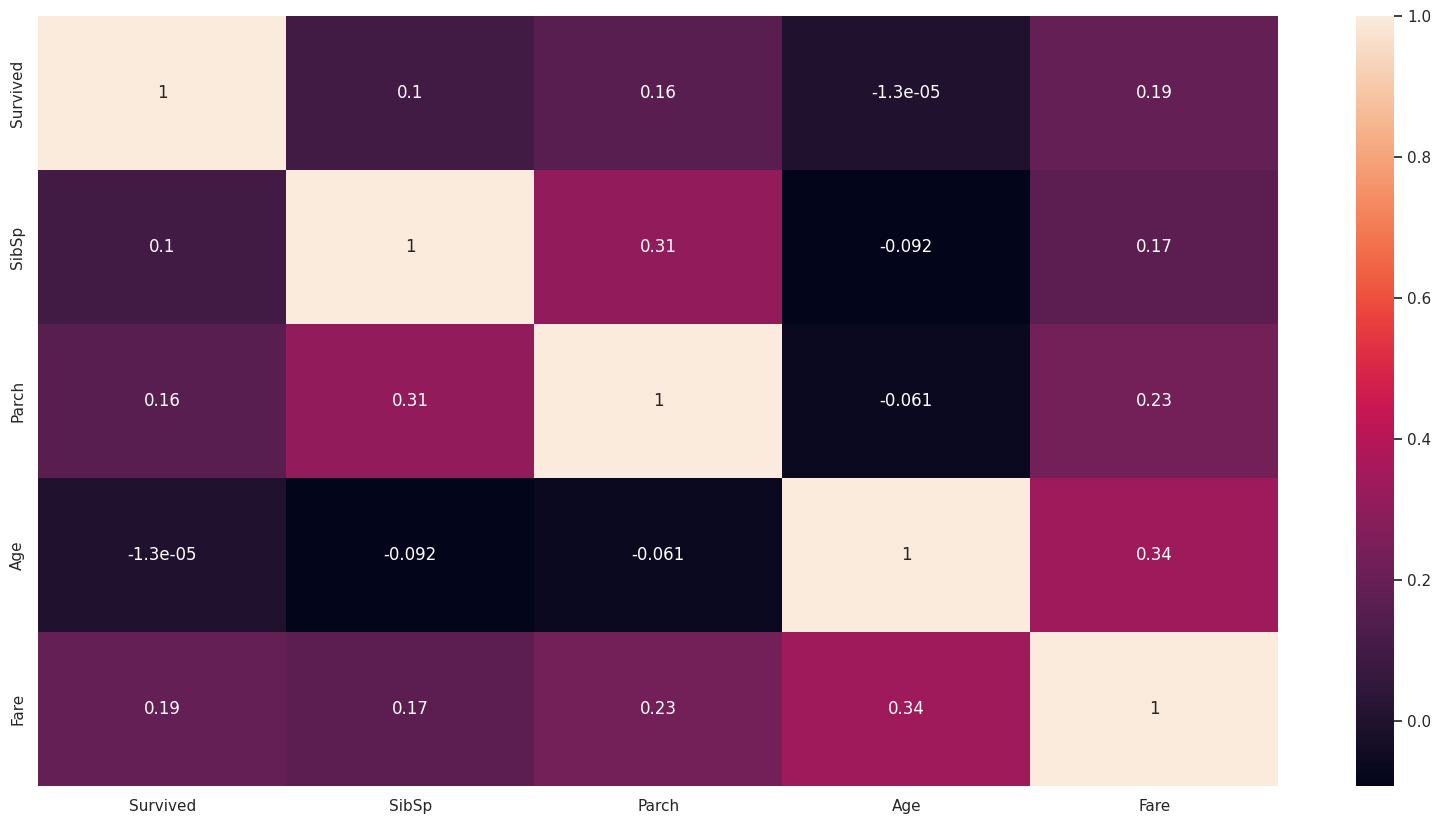

In [107]:
heatmap = sns.heatmap(df[["Survived", "SibSp", "Parch", "Age", "Fare"]].corr(),annot = True)
sns.set(rc={'figure.figsize':(20,10)})

These values are the correlation values.  The lighter the color is the more correlated the value is.
Let’s compare the Survived with Sibsp you’re getting the value 0.1. It means that SibSp is little correlated to Survived.Then Parch has a 0.16 value which shows more correlation. Then Age, which has no correlation. In the end, we have Fare whose value of correlation with the Survived variable is 0.19 which shows  the fare has more chances of survival.

# **visualizing the impact of each feature on the target variable**

 **SibSp – Number of Siblings / Spouses aboard the Titanic**

In [108]:
# Finding unique values
df['SibSp'].unique()

array([0, 1, 2, 3, 4, 5, 8])

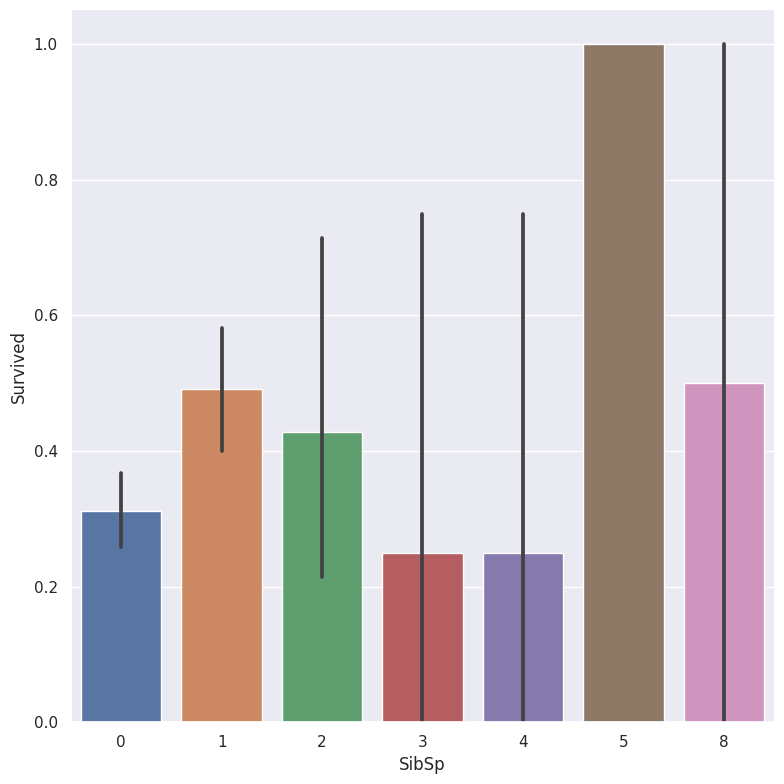

In [109]:
bargraph_sibsp = sns.catplot(x = "SibSp", y = "Survived", data = df,kind="bar", height = 8)

Passengers having 5 or 8 siblings have good chances of survival


**Age Column**

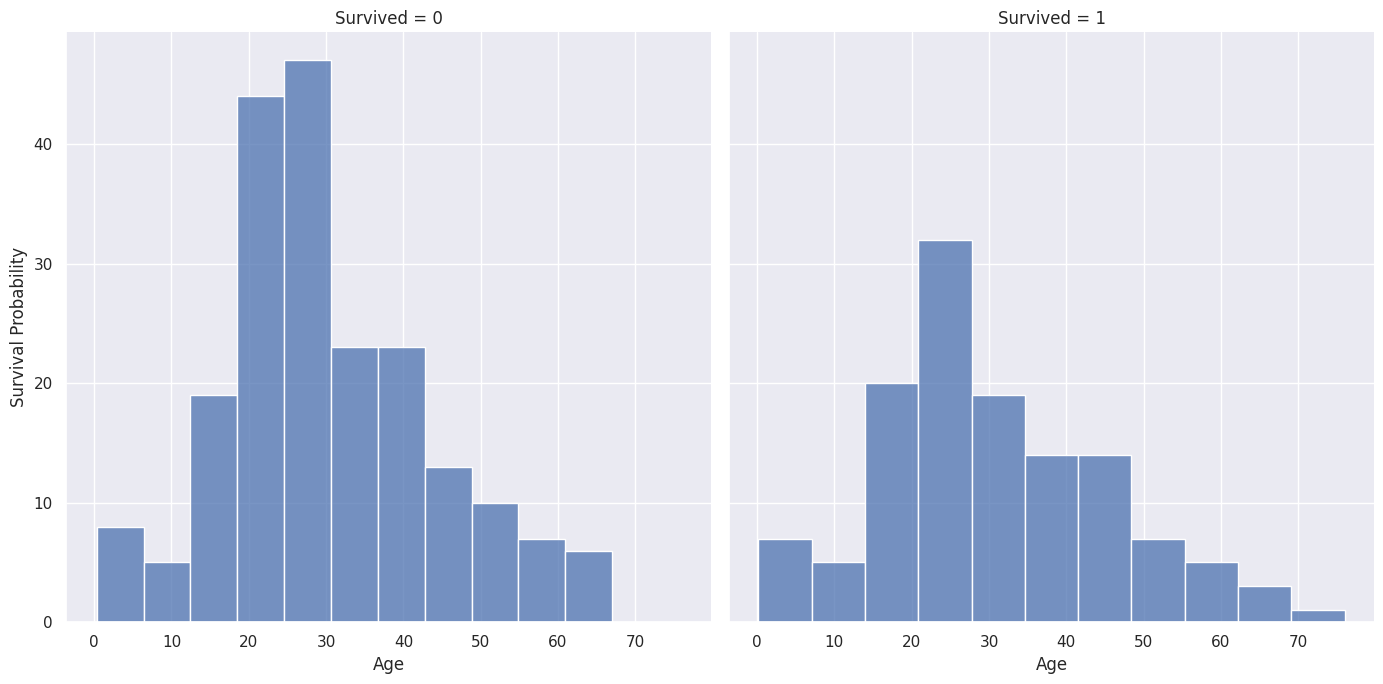

In [110]:
ageplot = sns.FacetGrid(df, col="Survived", height = 7)
ageplot = ageplot.map(sns.histplot, "Age")
ageplot = ageplot.set_ylabels("Survival Probability")

 it shows that More age less is the chances of survival

**Gender** **Column**

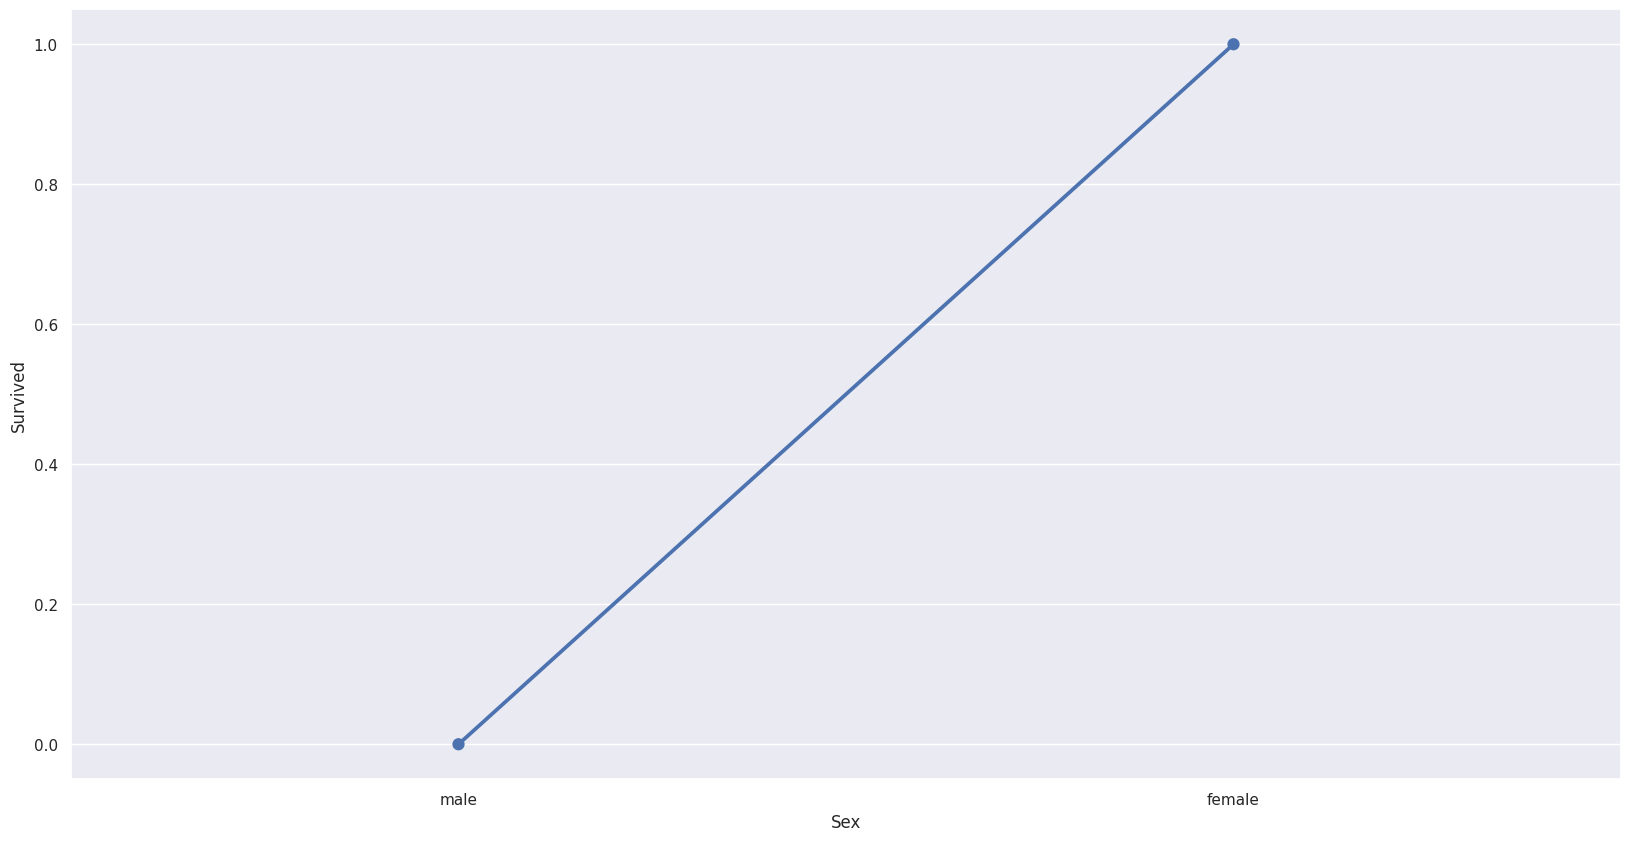

In [111]:
sexplot = sns.pointplot(x="Sex", y="Survived", data=df)
plt.show()

it’s quite obvious to say that man has no chances of survival over females

**Pclass** **Column**

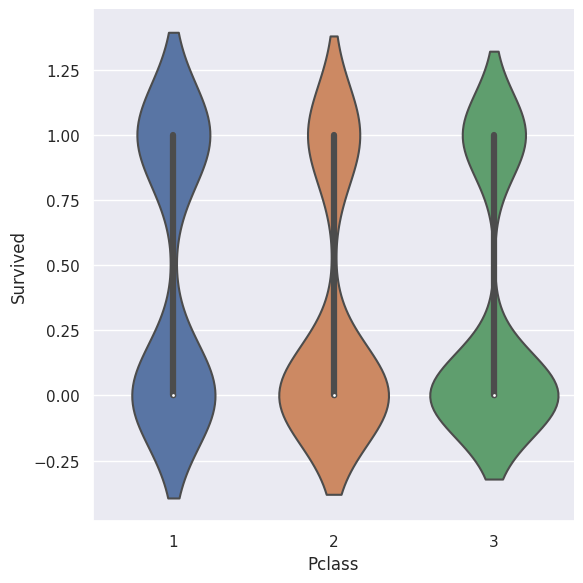

In [112]:
pclassplot = sns.catplot(x = "Pclass", y="Survived", data = df, kind="violin", height = 6)

it shows that first class passenger has more chances of survival over 2nd and 3rd class passengers & Similarly the 2nd class passengers have more chances of survival over 3rd class passengers.

# **Data Preprocessing**

In [113]:
mean = df["Age"].mean()
std = df["Age"].std()

rand_age = np.random.randint(mean-std, mean+std, size =86 )
age_slice = df["Age"].copy()
age_slice[np.isnan(age_slice)] = rand_age
df["Age"] = age_slice

# Again checking for null values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

# **Dropping Columns**

In [114]:
col_to_drop = ["PassengerId", "Ticket", "Cabin", "Name"]
df.drop(col_to_drop, axis=1, inplace=True)
df.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,34.5,0,0,7.8292,Q
1,1,3,female,47.0,1,0,7.0000,S
2,0,2,male,62.0,0,0,9.6875,Q
3,0,3,male,27.0,0,0,8.6625,S
4,1,3,female,22.0,1,1,12.2875,S
5,0,3,male,14.0,0,0,9.2250,S
6,1,3,female,30.0,0,0,7.6292,Q
7,0,2,male,26.0,1,1,29.0000,S
8,1,3,female,18.0,0,0,7.2292,C
9,0,3,male,21.0,2,0,24.1500,S


# **Converting Categorical Variables to Numeric**

In [168]:
genders = {"male":0, "female":1}
df["Sex"] = df["Sex"].replace(genders)

ports = {"S":0, "C":1, "Q":2}
df["Embarked"] = df["Embarked"].replace(ports)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,34.5,0,0,7.8292,2
1,1,3,1,47.0,1,0,7.0000,0
2,0,2,0,62.0,0,0,9.6875,2
3,0,3,0,27.0,0,0,8.6625,0
4,1,3,1,22.0,1,1,12.2875,0


# **Building Machine Learning Model**

In [194]:
train_x = df[['Pclass', 'Age','SibSp', 'Embarked']]

# Target variable column
train_y = df[['Survived']]

# Train Test Splitting
x_train, x_test, y_train, y_test = train_test_split(train_x, train_y, test_size=0.20, random_state=0)
print(x_train.shape,x_test.shape)



(334, 4) (84, 4)


# **LogisticRegression**

In [195]:
model = LogisticRegression()
model.fit(x_train, y_train.values.ravel())
lr_y_pred = model.predict(x_test)
lr_accuracy = accuracy_score(y_test,lr_y_pred)*100
print("accuracy=",lr_accuracy)

accuracy= 54.761904761904766


# **K-Neighbor Classifier**

In [196]:
m = KNeighborsClassifier(5)
m.fit(x_train, y_train.values.ravel())
kn_y_pred = m.predict(x_test)
kn_accuracy = accuracy_score(y_test,kn_y_pred)*100

print("accuracy=",kn_accuracy)

accuracy= 50.0


# **DecisionTree**

In [197]:
md = tree.DecisionTreeClassifier()
md = md.fit(x_train, y_train)
dt_y_pred = md.predict(x_test)
dt_accuracy = accuracy_score(y_test,dt_y_pred)*100

print("accuracy=",dt_accuracy)

accuracy= 60.71428571428571


Since we're getting maximum accuracy score with Decision Tree Classifier so we choose it for making predictions